In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_rel
data = pd.read_csv(r"cleaned_up.csv")

In [2]:
data.head()

,experiment_group,starting_experiment,age,gender,education_level,l1,l2,l3,l4,l5,l6,cs1,cs2,cs3,likert,customer_satisfaction
0,B,B,24,male,High school,3,4,6,8,8,6,4,6,5,5.83,5.00
1,A,B,24,male,High school,3,6,6,8,6,5,5,5,5,5.67,5.00
2,B,B,25,male,High school,3,5,5,1,5,8,2,4,3,4.50,3.00
3,A,B,25,male,High school,4,6,5,1,2,3,3,5,3,3.50,3.67
4,A,A,22,male,Bachelor's degree,2,2,3,6,3,3,2,4,2,3.17,2.67


In [3]:
data['average_humanness'] = ((data.l1 + data.l2 + data.l3 + data.l4 + data.l5 + data.l6) / 6)
data['average_satisfaction'] = ((data.cs1 + data.cs2 + data.cs3) / 3)
data['Experiment_type'] = np.where(data['experiment_group'] == 'A', 'Delay', 'No Delay')

In [4]:
data.head()

,experiment_group,starting_experiment,age,gender,education_level,l1,l2,l3,l4,l5,l6,cs1,cs2,cs3,likert,customer_satisfaction,average_humanness,average_satisfaction,Experiment_type
0,B,B,24,male,High school,3,4,6,8,8,6,4,6,5,5.83,5.00,5.833333,5.000000,No Delay
1,A,B,24,male,High school,3,6,6,8,6,5,5,5,5,5.67,5.00,5.666667,5.000000,Delay
2,B,B,25,male,High school,3,5,5,1,5,8,2,4,3,4.50,3.00,4.500000,3.000000,No Delay
3,A,B,25,male,High school,4,6,5,1,2,3,3,5,3,3.50,3.67,3.500000,3.666667,Delay
4,A,A,22,male,Bachelor's degree,2,2,3,6,3,3,2,4,2,3.17,2.67,3.166667,2.666667,Delay


In [5]:
average_humanness_nodelay = data['average_humanness'].where(data['Experiment_type'] == 'No Delay').dropna().mean()
average_humanness_delay = data['average_humanness'].where(data['Experiment_type'] == 'Delay').dropna().mean()

average_satisfaction_nodelay = data['average_satisfaction'].where(data['Experiment_type'] == 'No Delay').dropna().mean()
average_satisfaction_delay = data['average_satisfaction'].where(data['Experiment_type'] == 'Delay').dropna().mean()

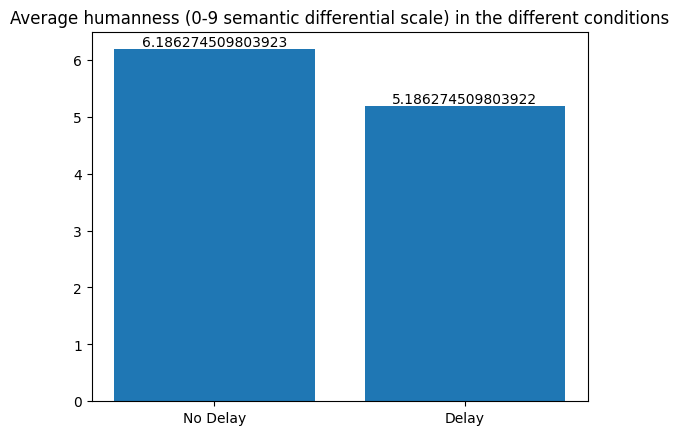

In [6]:
barplot=plt.bar(x=data.Experiment_type.unique(), height=[average_humanness_nodelay,average_humanness_delay])
plt.bar_label(barplot,labels=[average_humanness_nodelay,average_humanness_delay],label_type='edge')
plt.title('Average humanness (0-9 semantic differential scale) in the different conditions')
plt.show()

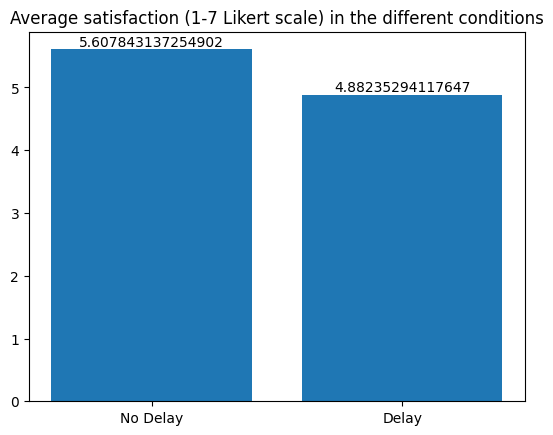

In [7]:
barplot=plt.bar(x=data.Experiment_type.unique(), height=[average_satisfaction_nodelay,average_satisfaction_delay])
plt.bar_label(barplot,labels=[average_satisfaction_nodelay,average_satisfaction_delay],label_type='edge')
plt.title('Average satisfaction (1-7 Likert scale) in the different conditions')
plt.show()

Pearsons correlation: 0.776


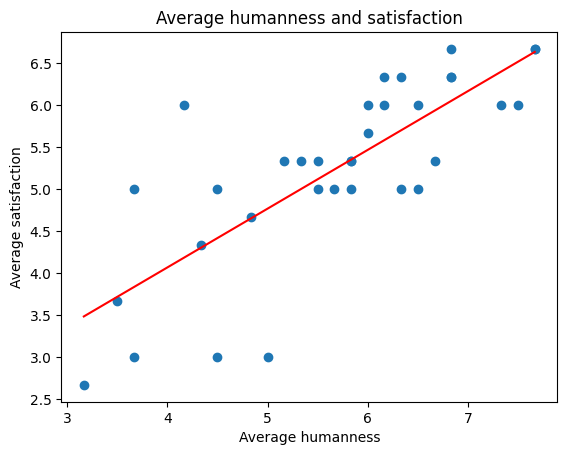

In [8]:
x, y = data['average_humanness'], data['average_satisfaction']
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)
plt.xlabel('Average humanness')
plt.ylabel('Average satisfaction')
plt.title('Average humanness and satisfaction')
plt.show()

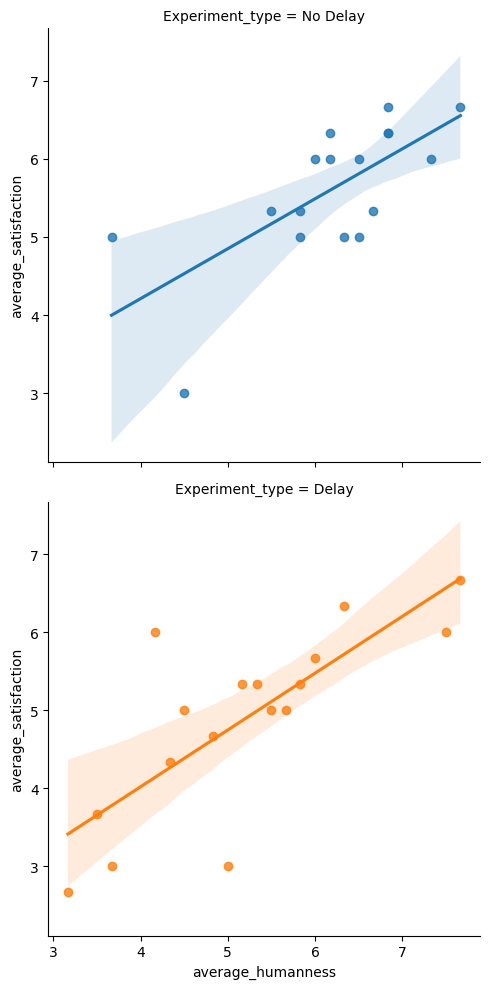

In [27]:
sns.lmplot(data=data, x="average_humanness", y="average_satisfaction", row="Experiment_type", hue="Experiment_type")

Pearsons correlation: 0.692


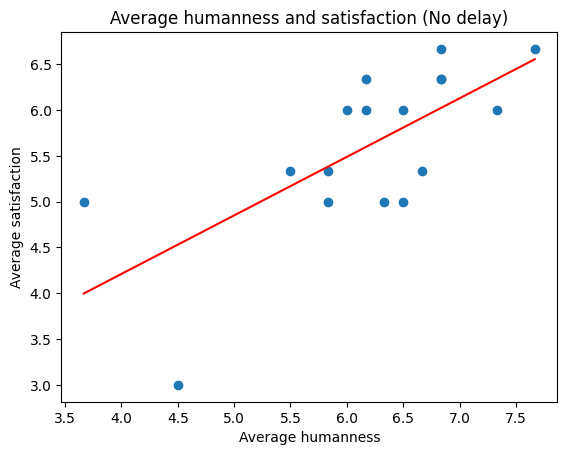

In [12]:
average_humanness_nodelay2 = data['average_humanness'].where(data['Experiment_type'] == 'No Delay').dropna()
average_humanness_delay2 = data['average_humanness'].where(data['Experiment_type'] == 'Delay').dropna()

average_satisfaction_nodelay2 = data['average_satisfaction'].where(data['Experiment_type'] == 'No Delay').dropna()
average_satisfaction_delay2 = data['average_satisfaction'].where(data['Experiment_type'] == 'Delay').dropna()

x, y = average_humanness_nodelay2, average_satisfaction_nodelay2
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)
plt.xlabel('Average humanness')
plt.ylabel('Average satisfaction')
plt.title('Average humanness and satisfaction (No delay)')
plt.show()

In [ ]:
x, y = average_humanness_delay2, average_satisfaction_delay2
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)
plt.xlabel('Average humanness')
plt.ylabel('Average satisfaction')
plt.title('Average humanness and satisfaction (Delay)')
plt.show()

In [ ]:
ttest_humanness= ttest_rel(average_humanness_delay2,average_humanness_nodelay2)
ttest_satisfaction = ttest_rel(average_satisfaction_delay2,average_satisfaction_nodelay2)

In [ ]:
print(ttest_humanness)
print(ttest_satisfaction)